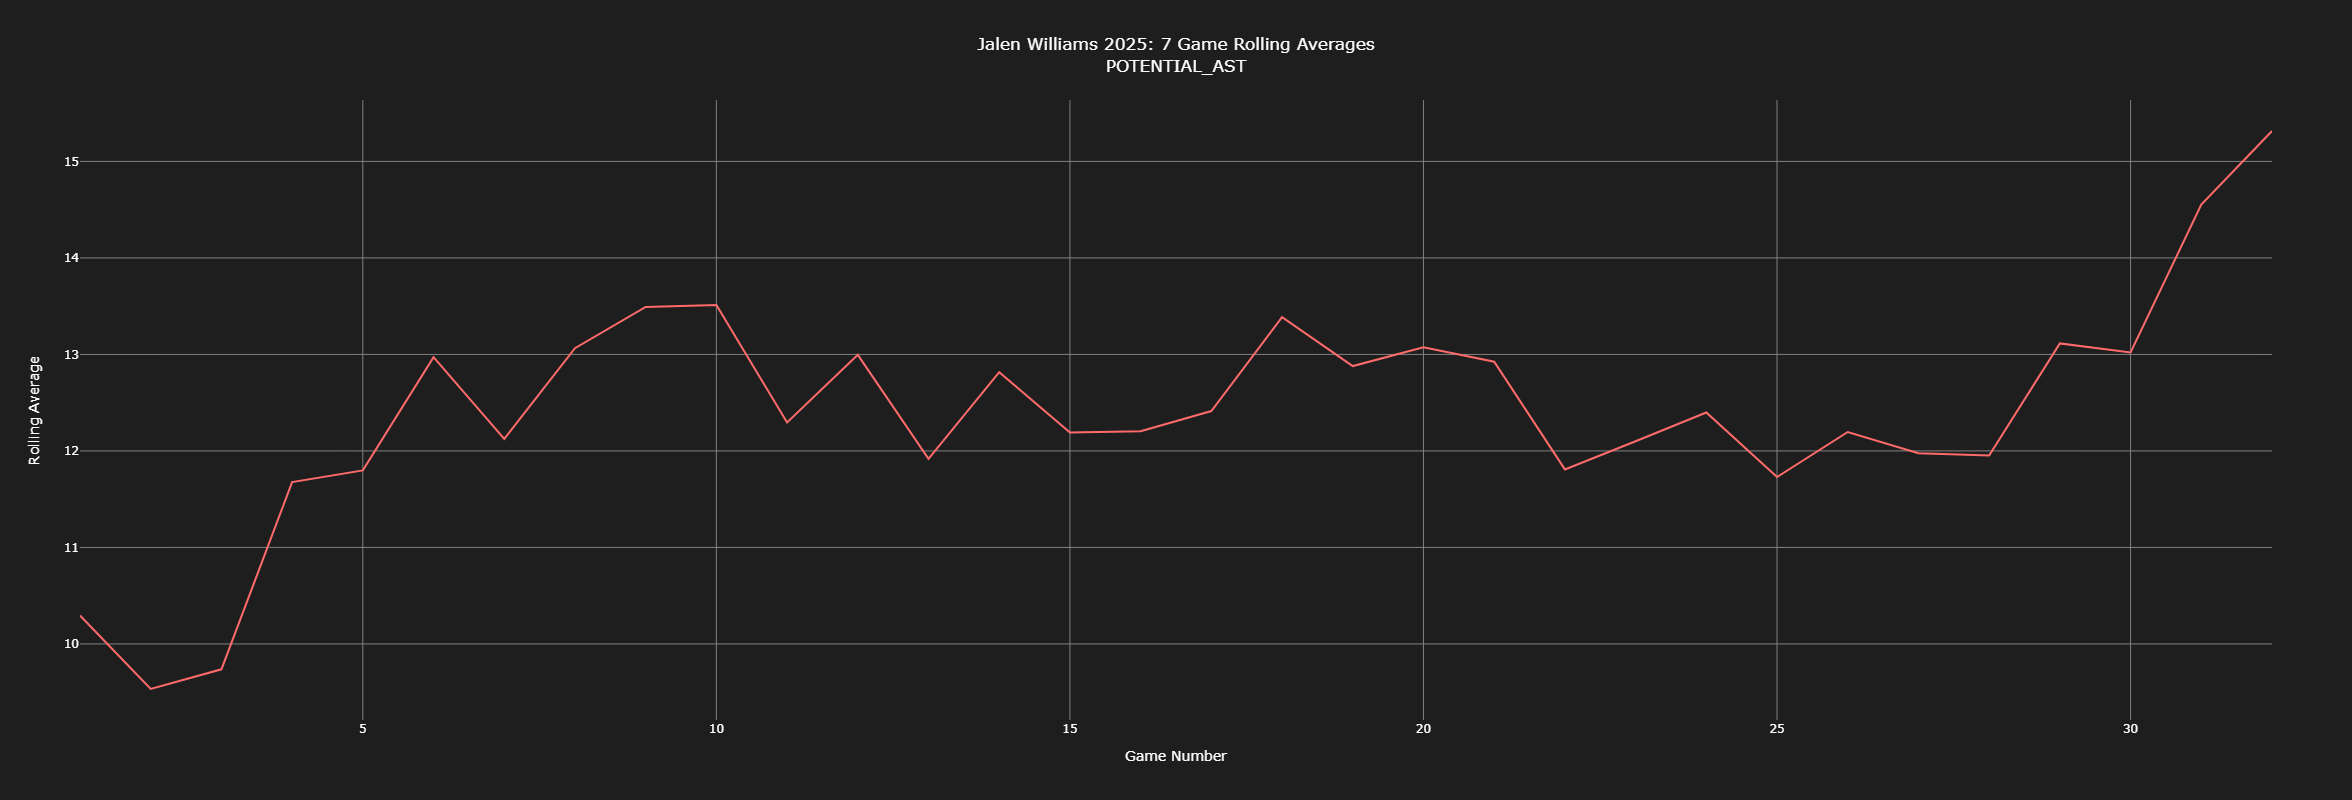

In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def category_rolling_averages(player_id, start_year, end_year, categories, rolling_window, selected_rate):
    """
    Create a Plotly visualization of a player's rolling averages for selected categories.
    
    Parameters:
    - player_id (int): The unique ID of the player to highlight.
    - start_year (int): Beginning of the year range.
    - end_year (int): End of the year range (inclusive).
    - categories (list): List of statistical categories to visualize.
    - rolling_window (int): Window size for the rolling average.
    - selected_rate (str): Rate of statistic ('Per 100' or 'Per Game').
    
    Returns:
    - Plotly Figure object.
    """
    # Fetch and combine data for the specified year range
    columns_to_read = ['POSS', 'GP', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'MIN', 'PLAYER_ID']
    columns_to_read.extend(categories)
    frames = []
    for year in range(start_year, end_year + 1):
        file_path = f'https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/game_report/year_files/{year}_games.csv'
        df = pd.read_csv(file_path,usecols=columns_to_read)
        df['year'] = year
        df['PLAYER_ID'] = df['PLAYER_ID'].astype(int)
        frames.append(df)
    data = pd.concat(frames)
    
    
    # Filter by player
    player_data = data[data['PLAYER_ID'] == player_id].reset_index(drop=True)
    name=player_data['PLAYER_NAME'].iloc[0]
    gamedays = [i for i in range(1, len(player_data) + 1)]
    player_data['gameday'] = gamedays
    
    # Apply rate conversion
    for cat in categories:
        if selected_rate == 'Per 100':
            player_data[cat] = 100 * player_data[cat] / player_data['POSS']
        elif selected_rate == 'Per Game':
            player_data[cat] = player_data[cat] / player_data['GP']
    
    # Compute rolling averages
    rolling_data = player_data[['gameday'] + categories].copy()
    for cat in categories:
        rolling_data[cat] = rolling_data[cat].rolling(window=rolling_window, min_periods=1).mean()
    
    # Plot data
    traces = []
    color_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FDCB6E']
    
    for i, cat in enumerate(categories):
        traces.append(go.Scatter(
            x=rolling_data['gameday'],
            y=rolling_data[cat],
            mode='lines',
            name=cat,
            line=dict(color=color_palette[i % len(color_palette)], width=2),
            hovertemplate=f"<b>Game</b>: {{x}}<br><b>{cat} (Rolling Avg)</b>: {{y:.2f}}<extra></extra>"
        ))
    
    layout = go.Layout(
        title={
            'text': f'{name} {start_year}: {str(rolling_window)} Game Rolling Averages<br>'+categories[-1],
            'x': 0.5,
            'xanchor': 'center',
            'font': {'color': 'white'}
        },
        xaxis=dict(
            title='Game Number',
            titlefont=dict(color='white'),
            tickfont=dict(color='white'),
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        yaxis=dict(
            title='Rolling Average',
            titlefont=dict(color='white'),
            tickfont=dict(color='white'),
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        paper_bgcolor='#1e1e1e',  # Dark background
        plot_bgcolor='#1e1e1e',   # Dark background
        hovermode='x unified',
        width=1100,
        height=800,
        legend=dict(
            font=dict(color='white'),
            bgcolor='#1e1e1e',
            bordercolor='gray',
            borderwidth=1
        )
    )
    
    fig = go.Figure(data=traces, layout=layout)
    return fig

# Example usage
player_id =1631114
start_year = 2025
end_year = 2025
categories = [ 'POTENTIAL_AST']
rolling_window = 7
selected_rate = 'Per 100'

fig = category_rolling_averages(player_id, start_year, end_year, categories, rolling_window, selected_rate)
fig.show()


